> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

The dataset includes information on over 110,000 medical appointments in Brazil, covering 14 variables related to patient demographics, scheduling, and health conditions. A major focus is on whether patients attended their appointments, aiming to identify factors that could reduce missed appointments and improve healthcare services. This dataset, provided by Joni Hoppen and Aquarela Analytics, also includes socioital and conomic details, like whether a patient is part of Bolsa Família, a social welfare program in Brazil.

### Dataset Description

Each variable offers valuable information for analysis, with **obvious names** that clarify their content. The only variable which need clarification is the **Scholarship**

Now let's describe each variable meaning:

- **PatientID** is a **numeric** column identifies a patient.

- **AppointmentID** is a **numeric** column identifies a appointment.

- **Gender** is a **string** column shows whether the gender Male or Female.

- **ScheduledDay** is a **string** column shows the day of the actuall appointment, when they have to visit the doctor.

- **AppointmentDay** is a **string** column shows the day someone called or registered the appointment, this is before appointment of course.

- **Age** is a **numeric** column shows how old patient is.

- **Neighbourhood** is a **string** column shows where the appointment takes place.

- **Scholarship** is a **True/False** column, refers to whether a patient receives benefits from Brazil’s Bolsa Família program. This program provides financial aid to **low-income families** on the condition that children stay in school and are vaccinated. The program aims to support families in meeting basic needs while promoting children's education and health. It has improved school attendance, nutrition, and reduced child labor rates in Brazil.

- **Hipertension** is a **True/False** column, shows if the patient has Hipertension or not.

- **Diabetes** is a **True/False** column, shows if the patient has Diabetes or not.

- **Alcoholism** is a **True/False** column, shows if the patient has Alcoholism or not.

- **Handcap** is a **numeric** column, Originally assumed to be a boolean attribute (indicating whether a patient has a disability), it was clarified through the [Kaggle Discussion Section](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) that this attribute represents a count of disabilities. Specifically:
  - Handcap = 0 indicates no disabilities.
  - Handcap = 1 indicates a single disability (though the type is unspecified).
  - Higher values (e.g., Handcap = 2, 3, 4) indicate multiple disabilities.

- **SMS_received** is a **numeric** column, shows how many messages sent to the patient.

- **No-show** is a **True/False** column, shows if the patient appeared in the appoinment or not.

### Question(s) for Analysis

The **Primary Question** is:

- What are the most significant factors affecting patient no-shows?

**Detailed Sub-Questions**:

- How does the time between scheduling and appointment day affect the likelihood of a no-show?
- Are specific demographics (age, gender, neighborhood) more likely to miss appointments?
- Does receiving an SMS reminder reduce no-show rates?

**Statistical Questions**:

- What statistical relationship exists between social factors (like scholarship status) and appointment attendance?
- What are the age and gender distributions for those who show up vs. no-show?

**Data Wrangling and Cleaning Questions**

- Are there any missing values in the data, and how should they be handled?
- Is any variable transformation needed to make analysis easier?


In [362]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# packages to explore the dataset
import pandas as pd
import numpy as np
import matplotlib as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [363]:
# import a function to update the dataset if the dataset has been long downloaded.
from dataset_setup import setup

<a id='wrangling'></a>
## Data Wrangling

> Note that I've kept the process as it is here once I started until I end, even though I found some enhancements in the dataset, like the type of handcap... etc. The goal of keeping the process is to show you how I was investigating the dataset.

Now Let's start exploring the dataset. First things first, we need to load the dataset.

In [364]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset were loaded successfully without any missing column. 

The numbers on the Patient ID and Appointment ID looks confusing in the scientific notation so lets reformat it.

In [365]:
pd.options.display.float_format = '{:.0f}'.format
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Looks better Now.

I note that the columns are in Snake case, this will be annoying when trying to handle the column so i'll rename then to be in lower case.

In [366]:
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

**Questions:** 
- Are there any missing values in the data, and how should they be handled?
- Can we reduce the Datatypes of the column to reduce the memory usage?
- Is the data entered valid?

In [367]:
# check for missing values, duplicates and data types
df.info()

# df.dtypes, df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So the dataset has **110527** entries, there's **no missing data** which is a good start. But we can address some **problems** here like:

- Patient ID can be represented in **Inteager** form instead of **float** form since there's no floating part in the ID's in general.
- Schedual and appointment days shold be represented as **timestamp** instead of **string**.
- scholarship, hipertension, diabetes, alcoholism, and handcap, should be all **boolean** columns instead of **inteagers**.

Now lets check if we can reduce the range of datatypes to reduce the memory usage. In the same time validate the data and its values.

In [368]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


We have a few problems Here.
- **PatientID** The range from 39,218 to almost one quadrillion (999981631772427) seems unusual. This could suggest that PatientId includes a variety of formats or may not represent typical patient IDs (often not this large). It’s worth investigating if some IDs are outliers or generated in an inconsistent format.

- **Age** has two unusual events:
    - The minimum age is **-1**, which doesn't make sense. This likely indicates a data entry error.
    - Ages range up to 115, which is possible but uncommon. It may be valid if there are patients at that age, but we need to check for any inaccuracies.

- **Handcap** has a maximum value of 4, which weird since the Handcap was introduced as a **boolean** column in the description of the dataset.

Lets These problems first:

In [369]:
(df['patientid'].nunique(), df['patientid'].count())

(62299, np.int64(110527))

The Patient IDs were reused which is logical since any patient can attend to visit multiple times.

<Axes: title={'center': 'Distribution of patient IDs'}, ylabel='Frequency'>

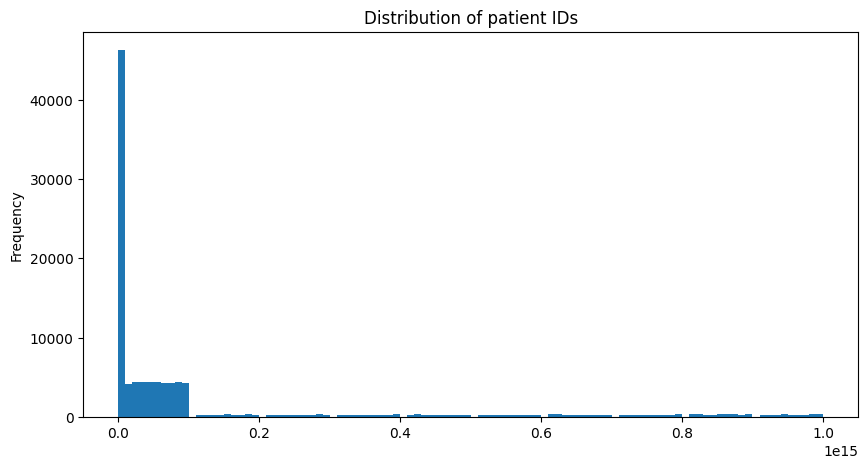

In [370]:
df["patientid"].plot(
    kind="hist", 
    bins=100, 
    figsize=(10, 5),
    title="Distribution of patient IDs"
)

The Distribution of the ID's highly skewed around 0, which means there's a little number of ID's consists of large number.

In [371]:
df['handcap'].value_counts()

handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

According to this [Discussion Section](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699), The handcap is numeric value which represent the number of disabilites the patient has, therfore we can treat it as a count of disabilities rather than a boolean type. 


Check about the duplicates

In [372]:
df.duplicated().sum()

np.int64(0)

In [373]:
def cols_value_counts(df):
    value_counts = {col: df[col].value_counts().shape[0] for col in df.columns}
    return value_counts

In [374]:
cols_value_counts(df)


{'patientid': 62299,
 'appointmentid': 110527,
 'gender': 2,
 'scheduledday': 103549,
 'appointmentday': 27,
 'age': 104,
 'neighbourhood': 81,
 'scholarship': 2,
 'hipertension': 2,
 'diabetes': 2,
 'alcoholism': 2,
 'handcap': 5,
 'sms_received': 2,
 'no-show': 2}

The other columns looks fine and without any issues. 

Now lets step back and reduce the ranges of the columns.

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [376]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


- **Appointment ID** can be reduced to fit int32

- **age**, **handcap**, and **sms recived** can be reduced to fit int8

-  **Gender** and **No-Show** can be represented as catigoral.

After checking the issues, let’s talk about other data we can get from this dataset to help with our analysis. 

One idea is to look at the time difference between the scheduled day and the appointment day to see if it could be important. Calculating this difference might give useful insights for our analysis. But we can't make it right now due to the datatype of the two columns.


### Data Cleaning


Now everything is clear, we can start cleaning the dataset.

First we need to change the datatypes of the attributes.

In [377]:
# changing the data types of the columns
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

Now after the conversion of the datatypes of **appointment day** and **scheduled day** we can create the column **days_to_appointment**

In [381]:
df = df.copy()

df['days_to_appointment'] = (df['appointmentday'] - df['scheduledday']).dt.days
df['days_to_appointment'].describe()

count   110527
mean         9
std         15
min         -7
25%         -1
50%          3
75%         14
max        178
Name: days_to_appointment, dtype: float64

In [378]:
df['patientid'] = df['patientid'].astype(np.int64)
df['appointmentid'] = df['appointmentid'].astype(np.int32)
df['age'] = df['age'].astype(np.int8)
df['handcap'] = df['handcap'].astype(np.int8)
df['sms_received'] = df['sms_received'].astype(np.int8)

In [ ]:
df['no-show'] = df['no-show'].astype('category')
df['gender'] = df['gender'].astype('category')

In [ ]:
df['scholarship'] = df['scholarship'].astype(bool)
df['hipertension'] = df['hipertension'].astype(bool)
df['diabetes'] = df['diabetes'].astype(bool)
df['alcoholism'] = df['alcoholism'].astype(bool)

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   patientid            110527 non-null  int64              
 1   appointmentid        110527 non-null  int32              
 2   gender               110527 non-null  category           
 3   scheduledday         110527 non-null  datetime64[ns, UTC]
 4   appointmentday       110527 non-null  datetime64[ns, UTC]
 5   age                  110527 non-null  int8               
 6   neighbourhood        110527 non-null  object             
 7   scholarship          110527 non-null  bool               
 8   hipertension         110527 non-null  bool               
 9   diabetes             110527 non-null  bool               
 10  alcoholism           110527 non-null  bool               
 11  handcap              110527 non-null  int8               
 12  sm

Now we should remove the invalid data 

In [383]:
df = df.query('age >= 0')
df.describe()

,patientid,appointmentid,age,handcap,sms_received,days_to_appointment
count,110526,110526,110526,110526,110526,110526
mean,147493384515987,5675304,37,0,0,9
std,256094287454517,71295,23,0,0,15
min,39217,5030230,0,0,0,-7
25%,4172535777719,5640285,18,0,0,-1
50%,31731838713978,5680572,37,0,0,3
75%,94389629939367,5725523,55,0,1,14
max,999981631772427,5790484,115,4,1,178


In [384]:
cols_value_counts(df)

{'patientid': 62298,
 'appointmentid': 110526,
 'gender': 2,
 'scheduledday': 103548,
 'appointmentday': 27,
 'age': 103,
 'neighbourhood': 81,
 'scholarship': 2,
 'hipertension': 2,
 'diabetes': 2,
 'alcoholism': 2,
 'handcap': 5,
 'sms_received': 2,
 'no-show': 2,
 'days_to_appointment': 131}

In [389]:
df= df.query('days_to_appointment >= 0')
df.shape


(71959, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [386]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [387]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [388]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

c:\Users\obada\AppData\Local\Programs\Python\Python313\python.exe: No module named nbconvert
